<a href="https://colab.research.google.com/github/ChathuminiDisanayaka/Linear-Regression/blob/main/01_Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The estimated relative performance values were estimated by the authors using a linear regression method.
Selection: Regression
For assignment

**Import neccessary libraries**

In [ ]:
%matplotlib inline
import pandas as pd
#for mathematical functions
import numpy as np 
#plottting functions
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D

**Import the dataset**

In [ ]:

data_df = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
data = pd.read_csv(data_df,header=None)


In [ ]:
dfnew = data.select_dtypes(include=np.number)
dfnew

,2,3,4,5,6,7,8,9
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42,37
205,98,1000,8000,32,2,8,46,50
206,125,2000,8000,0,2,14,52,41
207,480,512,8000,32,0,0,67,47


**Filter only numeric data**

**Normalize the dataset** 

In [ ]:
dfnew = normalize(dfnew, axis=0)

Pre process the data

**Seperate data into X and Y variable**

In [ ]:
#Independent variable
X = dfnew[:, 0:7]
#Dependent variable  
Y = dfnew[:, 7:] 

**Data visulaization**

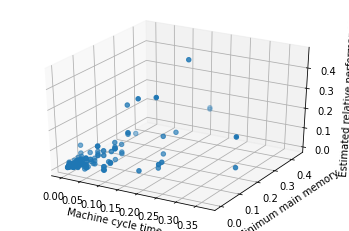

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xaxis = X[:, 3]
yaxis = X[:, 4]
zaxis = Y
ax.scatter(xaxis, yaxis, zaxis)

ax.set_xlabel('Machine cycle time')
ax.set_ylabel('Minimum main memory')
ax.set_zlabel('Estimated relative performance')

plt.show()

**Hyperparameters**

In [ ]:
alpha = 0.01
n = 2000

**The thet parameter**

Assign theta as '0' for the hypothesis

In [ ]:
theta = np.zeros((dfnew.shape[1],1))
print(theta)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


**Make Hypothesis**


Define the function needed to generate the hypothesis

In [ ]:
def hypothesis (theta, X) :
  tX = np.ones((X.shape[0], X.shape[1] + 1))
  tX[:,1:] = X
  return np.matmul(tX, theta)

**Define cost function**

In [ ]:
def cost_func (theta, X, Y) :
   return np.average(np.square(Y - hypothesis(theta, X))) / 2

**Define gradient descent algorithm**

In [ ]:
def gradient (theta, X, Y) :
  tX = np.ones((X.shape[0], X.shape[1] + 1))
  tX[:,1:] = X
  d_theta = - np.average((Y - hypothesis(theta, X)) * tX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

In [ ]:
def gradient_descent (theta, X, Y, alpha, n, gap) :
  cost = np.zeros(n)
  for i in range(n) :
    d_theta = gradient (theta, X, Y)
    theta = theta - alpha * d_theta
    cost[i] = cost_func(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' cost : ', cost_func(theta, X, Y)) 
  return theta, cost

In [ ]:
theta, cost = gradient_descent (theta, X, Y, alpha, n,100)

iteration :  0  cost :  0.00237745069201059
iteration :  100  cost :  0.0017266713145470728
iteration :  200  cost :  0.0016108060043046929
iteration :  300  cost :  0.0015656621906048982
iteration :  400  cost :  0.0015305121266994603
iteration :  500  cost :  0.0014973948908676442
iteration :  600  cost :  0.0014652510390037183
iteration :  700  cost :  0.0014339241850678836
iteration :  800  cost :  0.0014033764981221432
iteration :  900  cost :  0.0013735860912952712
iteration :  1000  cost :  0.0013445335909053337
iteration :  1100  cost :  0.0013162003691110041
iteration :  1200  cost :  0.001288568302227613
iteration :  1300  cost :  0.0012616197288407693
iteration :  1400  cost :  0.0012353374343099452
iteration :  1500  cost :  0.0012097046389766808
iteration :  1600  cost :  0.0011847049871041527
iteration :  1700  cost :  0.0011603225361530125
iteration :  1800  cost :  0.0011365417463357428
iteration :  1900  cost :  0.0011133474704360464


In [ ]:
theta

array([[ 0.02770814],
       [-0.01396092],
       [ 0.04808264],
       [ 0.04673801],
       [ 0.03930422],
       [ 0.035777  ],
       [ 0.03498959],
       [ 0.05880745]])

**Plot cost vs iteration**

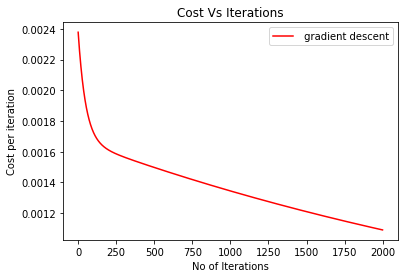

In [ ]:
fig, axes = plt.subplots()  
axes.plot(np.arange(n), cost, 'r')    
axes.legend(loc='upper right', labels=[' gradient descent'])
axes.set_xlabel('No of Iterations')  
axes.set_ylabel('Cost per iteration')  
axes.set_title('Cost Vs Iterations')  

plt.show()

Here, can observe that the cost gradullay decreases and converges.